In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from scipy.sparse import hstack
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss
from tqdm import tqdm_notebook, tqdm
from scipy import stats
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn import model_selection
import xgboost as xgb
import lightgbm as lgb
from sklearn import metrics
from scipy.optimize import minimize
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train (4).csv')
test = pd.read_csv('test (3).csv')

In [3]:
train.head()

,duration,wage-increase-first-year,wage-increase-second-year,wage-increase-third-year,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan,class
0,3,3.597483,4.000000,5.000000,0,40.000000,2,8.32238,3.0,0,11.0,0,1,1,1,2,1
1,3,3.968619,4.000000,5.100000,1,40.000000,2,2.00000,3.0,0,12.0,1,1,2,1,2,1
2,2,6.328544,5.089680,5.000000,0,35.915468,2,2.00000,4.0,0,12.0,1,1,1,1,2,1
3,2,4.348288,5.336979,5.000000,0,37.651356,2,2.00000,3.0,0,15.0,1,1,2,1,2,1
4,2,3.530789,2.892247,2.029438,0,40.000000,2,2.00000,4.0,0,11.0,1,1,1,1,2,1


In [4]:
test.head()

,duration,wage-increase-first-year,wage-increase-second-year,wage-increase-third-year,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,3,6.185539,6.413236,5.0,0,39.370976,2,2.0,3.0,0,11.000000,1,1,2,1,1
1,3,3.910114,4.000000,5.0,0,32.362697,2,2.0,3.0,0,8.981002,2,1,2,1,2
2,3,3.630483,4.000000,5.1,1,40.000000,2,14.0,3.0,0,11.000000,1,1,1,1,1
3,3,5.535537,4.596062,5.0,0,37.576895,2,2.0,3.0,0,11.000000,2,1,1,1,2
4,1,4.733623,4.619585,5.0,0,33.210407,2,10.0,4.0,1,11.000000,1,1,1,1,2


In [5]:
train['class'].value_counts()

1    20845
0    11152
Name: class, dtype: int64

In [123]:
train.isnull().sum()

duration                          0
wage-increase-first-year          0
wage-increase-second-year         0
wage-increase-third-year          0
cost-of-living-adjustment         0
working-hours                     0
pension                           0
standby-pay                       0
shift-differential                0
education-allowance               0
statutory-holidays                0
vacation                          0
longterm-disability-assistance    0
contribution-to-dental-plan       0
bereavement-assistance            0
contribution-to-health-plan       0
class                             0
dtype: int64

In [124]:
test.isnull().sum()

duration                          0
wage-increase-first-year          0
wage-increase-second-year         0
wage-increase-third-year          0
cost-of-living-adjustment         0
working-hours                     0
pension                           0
standby-pay                       0
shift-differential                0
education-allowance               0
statutory-holidays                0
vacation                          0
longterm-disability-assistance    0
contribution-to-dental-plan       0
bereavement-assistance            0
contribution-to-health-plan       0
dtype: int64

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31997 entries, 0 to 31996
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   duration                        31997 non-null  int64  
 1   wage-increase-first-year        31997 non-null  float64
 2   wage-increase-second-year       31997 non-null  float64
 3   wage-increase-third-year        31997 non-null  float64
 4   cost-of-living-adjustment       31997 non-null  int64  
 5   working-hours                   31997 non-null  float64
 6   pension                         31997 non-null  int64  
 7   standby-pay                     31997 non-null  float64
 8   shift-differential              31997 non-null  float64
 9   education-allowance             31997 non-null  int64  
 10  statutory-holidays              31997 non-null  float64
 11  vacation                        31997 non-null  int64  
 12  longterm-disability-assistance  

In [126]:
train.dtypes[train.dtypes == 'float64']

wage-increase-first-year     float64
wage-increase-second-year    float64
wage-increase-third-year     float64
working-hours                float64
standby-pay                  float64
shift-differential           float64
statutory-holidays           float64
dtype: object

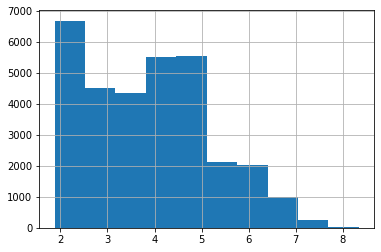

In [127]:
train['wage-increase-first-year'].hist()

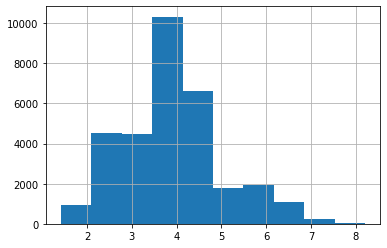

In [128]:
train['wage-increase-second-year'].hist()

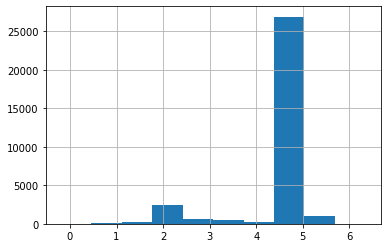

In [129]:
train['wage-increase-third-year'].hist()

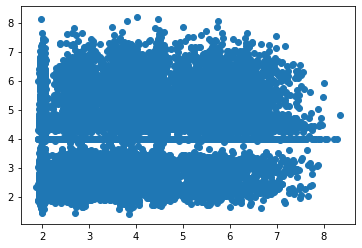

In [130]:
plt.scatter(train['wage-increase-first-year'], train['wage-increase-second-year'])

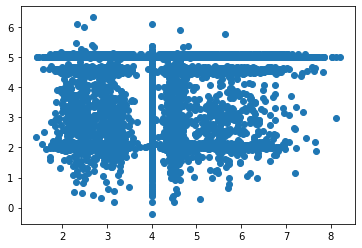

In [131]:
plt.scatter(train['wage-increase-second-year'], train['wage-increase-third-year'])

In [132]:
data=pd.concat([train,test],sort=False).reset_index(drop=True)
data.columns.tolist()

['duration',
 'wage-increase-first-year',
 'wage-increase-second-year',
 'wage-increase-third-year',
 'cost-of-living-adjustment',
 'working-hours',
 'pension',
 'standby-pay',
 'shift-differential',
 'education-allowance',
 'statutory-holidays',
 'vacation',
 'longterm-disability-assistance',
 'contribution-to-dental-plan',
 'bereavement-assistance',
 'contribution-to-health-plan',
 'class']

In [133]:
features= ['wage-increase-first-year']

In [134]:
def aggregate_features(x,col_name):
    x["max_"+col_name]=x[col_name].apply(np.max)
    x["min_"+col_name]=x[col_name].apply(np.min)
    x["mean_"+col_name]=x[col_name].apply(np.mean)
    #x["std_"+col_name]=x[col_name].apply(np.std)
    x["median_"+col_name]=x[col_name].apply(np.median)
    return x  

In [135]:
for col_name in tqdm(features):
    data=aggregate_features(data,col_name)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.60s/it]


In [136]:
train=data[data['class'].notnull()].reset_index(drop=True)
test=data[data['class'].isna()].reset_index(drop=True)

In [137]:
test = test.drop('class', axis=1)

In [138]:
train = train.round(2)
test = test.round(2)

In [139]:
train['working-hours'].describe()

count    31997.000000
mean        38.203318
std          2.460429
min         25.080000
25%         37.460000
50%         39.000000
75%         40.000000
max         43.120000
Name: working-hours, dtype: float64

In [140]:
X = train.drop('class', axis=1)
y = train['class']

In [62]:
param = {#'num_leaves': 124,
         #min_data_in_leaf': 5, 
         #'objective':'regression','n_estimators':1000,
         'max_depth': -1,
         #'learning_rate': 0.05,'reg_lambda':0.01,
         #"min_child_samples": 5,
         "boosting": "gbdt",
         "feature_fraction": 0.9,'early_stopping':100,
         "bagging_freq": 1,
         "bagging_fraction": 0.8 ,
         "bagging_seed": 224,
        # "metric": 'rmsle',
         "verbosity": -1}

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score, mean_absolute_error, mean_squared_error
errcb=[]
y_pred_totcb=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit, GroupKFold, RepeatedStratifiedKFold
fold=StratifiedKFold(n_splits=5,shuffle=True, random_state=101)#101
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index],
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostClassifier(eval_metric='F1')
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100)
    preds=m.predict(X_test)
    print("err: ",accuracy_score(y_test,preds))
    errcb.append(accuracy_score(y_test,preds))
    p = m.predict(test)
    y_pred_totcb.append(p)

Learning rate set to 0.070588
0:	learn: 0.9319710	test: 0.9319710	test1: 0.9302876	best: 0.9302876 (0)	total: 27.6ms	remaining: 27.6s
1:	learn: 0.9372541	test: 0.9372541	test1: 0.9343575	best: 0.9343575 (1)	total: 52.8ms	remaining: 26.4s
2:	learn: 0.9462742	test: 0.9462742	test1: 0.9447752	best: 0.9447752 (2)	total: 79.3ms	remaining: 26.3s
3:	learn: 0.9452297	test: 0.9452297	test1: 0.9446315	best: 0.9447752 (2)	total: 104ms	remaining: 25.9s
4:	learn: 0.9457558	test: 0.9457558	test1: 0.9451545	best: 0.9451545 (4)	total: 131ms	remaining: 26.1s
5:	learn: 0.9456332	test: 0.9456332	test1: 0.9443735	best: 0.9451545 (4)	total: 156ms	remaining: 25.9s
6:	learn: 0.9459994	test: 0.9459994	test1: 0.9444315	best: 0.9451545 (4)	total: 181ms	remaining: 25.7s
7:	learn: 0.9464494	test: 0.9464494	test1: 0.9448709	best: 0.9451545 (4)	total: 214ms	remaining: 26.6s
8:	learn: 0.9471906	test: 0.9471906	test1: 0.9458736	best: 0.9458736 (8)	total: 242ms	remaining: 26.7s
9:	learn: 0.9470929	test: 0.9470929	test

79:	learn: 0.9741932	test: 0.9741932	test1: 0.9741882	best: 0.9741882 (79)	total: 2.54s	remaining: 29.2s
80:	learn: 0.9743696	test: 0.9743696	test1: 0.9746640	best: 0.9746640 (80)	total: 2.59s	remaining: 29.4s
81:	learn: 0.9745187	test: 0.9745187	test1: 0.9745420	best: 0.9746640 (80)	total: 2.63s	remaining: 29.4s
82:	learn: 0.9744579	test: 0.9744579	test1: 0.9747739	best: 0.9747739 (82)	total: 2.66s	remaining: 29.4s
83:	learn: 0.9746937	test: 0.9746937	test1: 0.9745299	best: 0.9747739 (82)	total: 2.7s	remaining: 29.5s
84:	learn: 0.9746967	test: 0.9746967	test1: 0.9744078	best: 0.9747739 (82)	total: 2.73s	remaining: 29.4s
85:	learn: 0.9748138	test: 0.9748138	test1: 0.9745238	best: 0.9747739 (82)	total: 2.77s	remaining: 29.5s
86:	learn: 0.9749021	test: 0.9749021	test1: 0.9740414	best: 0.9747739 (82)	total: 2.8s	remaining: 29.4s
87:	learn: 0.9750742	test: 0.9750742	test1: 0.9746398	best: 0.9747739 (82)	total: 2.83s	remaining: 29.3s
88:	learn: 0.9751654	test: 0.9751654	test1: 0.9746459	bes

158:	learn: 0.9800048	test: 0.9800048	test1: 0.9753706	best: 0.9767220 (136)	total: 4.99s	remaining: 26.4s
159:	learn: 0.9800351	test: 0.9800351	test1: 0.9753765	best: 0.9767220 (136)	total: 5.01s	remaining: 26.3s
160:	learn: 0.9801250	test: 0.9801250	test1: 0.9754990	best: 0.9767220 (136)	total: 5.04s	remaining: 26.3s
161:	learn: 0.9801833	test: 0.9801833	test1: 0.9754990	best: 0.9767220 (136)	total: 5.07s	remaining: 26.2s
162:	learn: 0.9802136	test: 0.9802136	test1: 0.9756214	best: 0.9767220 (136)	total: 5.09s	remaining: 26.2s
163:	learn: 0.9803023	test: 0.9803023	test1: 0.9757380	best: 0.9767220 (136)	total: 5.12s	remaining: 26.1s
164:	learn: 0.9803910	test: 0.9803910	test1: 0.9757380	best: 0.9767220 (136)	total: 5.15s	remaining: 26s
165:	learn: 0.9803303	test: 0.9803303	test1: 0.9757380	best: 0.9767220 (136)	total: 5.17s	remaining: 26s
166:	learn: 0.9803000	test: 0.9803000	test1: 0.9757380	best: 0.9767220 (136)	total: 5.2s	remaining: 25.9s
167:	learn: 0.9802404	test: 0.9802404	test

err:  0.96953125
Learning rate set to 0.070588
0:	learn: 0.9264330	test: 0.9264330	test1: 0.9285303	best: 0.9285303 (0)	total: 30.9ms	remaining: 30.9s
1:	learn: 0.9393394	test: 0.9393394	test1: 0.9398234	best: 0.9398234 (1)	total: 63.2ms	remaining: 31.5s
2:	learn: 0.9435547	test: 0.9435547	test1: 0.9458036	best: 0.9458036 (2)	total: 91.3ms	remaining: 30.4s
3:	learn: 0.9480367	test: 0.9480367	test1: 0.9495542	best: 0.9495542 (3)	total: 120ms	remaining: 29.9s
4:	learn: 0.9481751	test: 0.9481751	test1: 0.9499941	best: 0.9499941 (4)	total: 157ms	remaining: 31.3s
5:	learn: 0.9462441	test: 0.9462441	test1: 0.9477987	best: 0.9499941 (4)	total: 195ms	remaining: 32.3s
6:	learn: 0.9485417	test: 0.9485417	test1: 0.9506390	best: 0.9506390 (6)	total: 225ms	remaining: 31.9s
7:	learn: 0.9480755	test: 0.9480755	test1: 0.9509080	best: 0.9509080 (7)	total: 255ms	remaining: 31.6s
8:	learn: 0.9485584	test: 0.9485584	test1: 0.9520122	best: 0.9520122 (8)	total: 283ms	remaining: 31.2s
9:	learn: 0.9490435	tes

81:	learn: 0.9744092	test: 0.9744092	test1: 0.9750653	best: 0.9750712 (80)	total: 2.71s	remaining: 30.4s
82:	learn: 0.9744031	test: 0.9744031	test1: 0.9747121	best: 0.9750712 (80)	total: 2.74s	remaining: 30.3s
83:	learn: 0.9743453	test: 0.9743453	test1: 0.9745843	best: 0.9750712 (80)	total: 2.77s	remaining: 30.2s
84:	learn: 0.9745780	test: 0.9745780	test1: 0.9745783	best: 0.9750712 (80)	total: 2.82s	remaining: 30.3s
85:	learn: 0.9746952	test: 0.9746952	test1: 0.9747001	best: 0.9750712 (80)	total: 2.85s	remaining: 30.3s
86:	learn: 0.9747760	test: 0.9747760	test1: 0.9748159	best: 0.9750712 (80)	total: 2.9s	remaining: 30.4s
87:	learn: 0.9747196	test: 0.9747196	test1: 0.9745843	best: 0.9750712 (80)	total: 2.94s	remaining: 30.4s
88:	learn: 0.9749236	test: 0.9749236	test1: 0.9752910	best: 0.9752910 (88)	total: 2.96s	remaining: 30.4s
89:	learn: 0.9751276	test: 0.9751276	test1: 0.9751693	best: 0.9752910 (88)	total: 3s	remaining: 30.4s
90:	learn: 0.9752478	test: 0.9752478	test1: 0.9752852	best:

164:	learn: 0.9789806	test: 0.9789806	test1: 0.9779736	best: 0.9781005 (162)	total: 5.45s	remaining: 27.6s
165:	learn: 0.9789818	test: 0.9789818	test1: 0.9778677	best: 0.9781005 (162)	total: 5.48s	remaining: 27.5s
166:	learn: 0.9790135	test: 0.9790135	test1: 0.9781005	best: 0.9781005 (162)	total: 5.51s	remaining: 27.5s
167:	learn: 0.9791884	test: 0.9791884	test1: 0.9783282	best: 0.9783282 (167)	total: 5.53s	remaining: 27.4s
168:	learn: 0.9791009	test: 0.9791009	test1: 0.9782117	best: 0.9783282 (167)	total: 5.57s	remaining: 27.4s
169:	learn: 0.9791313	test: 0.9791313	test1: 0.9780952	best: 0.9783282 (167)	total: 5.6s	remaining: 27.3s
170:	learn: 0.9791921	test: 0.9791921	test1: 0.9782117	best: 0.9783282 (167)	total: 5.63s	remaining: 27.3s
171:	learn: 0.9793354	test: 0.9793354	test1: 0.9783282	best: 0.9783282 (167)	total: 5.65s	remaining: 27.2s
172:	learn: 0.9793646	test: 0.9793646	test1: 0.9783282	best: 0.9783282 (167)	total: 5.68s	remaining: 27.2s
173:	learn: 0.9794229	test: 0.9794229	

244:	learn: 0.9809263	test: 0.9809263	test1: 0.9784138	best: 0.9790376 (188)	total: 7.81s	remaining: 24.1s
245:	learn: 0.9808959	test: 0.9808959	test1: 0.9784138	best: 0.9790376 (188)	total: 7.83s	remaining: 24s
246:	learn: 0.9809263	test: 0.9809263	test1: 0.9784138	best: 0.9790376 (188)	total: 7.86s	remaining: 24s
247:	learn: 0.9809566	test: 0.9809566	test1: 0.9785357	best: 0.9790376 (188)	total: 7.88s	remaining: 23.9s
248:	learn: 0.9809566	test: 0.9809566	test1: 0.9784190	best: 0.9790376 (188)	total: 7.91s	remaining: 23.9s
249:	learn: 0.9809881	test: 0.9809881	test1: 0.9784190	best: 0.9790376 (188)	total: 7.94s	remaining: 23.8s
250:	learn: 0.9809578	test: 0.9809578	test1: 0.9783023	best: 0.9790376 (188)	total: 7.96s	remaining: 23.8s
251:	learn: 0.9809274	test: 0.9809274	test1: 0.9782972	best: 0.9790376 (188)	total: 7.99s	remaining: 23.7s
252:	learn: 0.9809274	test: 0.9809274	test1: 0.9782972	best: 0.9790376 (188)	total: 8.02s	remaining: 23.7s
253:	learn: 0.9810758	test: 0.9810758	tes

33:	learn: 0.9655700	test: 0.9655700	test1: 0.9602633	best: 0.9603949 (32)	total: 980ms	remaining: 27.8s
34:	learn: 0.9650852	test: 0.9650852	test1: 0.9597836	best: 0.9603949 (32)	total: 1.01s	remaining: 27.8s
35:	learn: 0.9660328	test: 0.9660328	test1: 0.9604799	best: 0.9604799 (35)	total: 1.04s	remaining: 27.9s
36:	learn: 0.9661406	test: 0.9661406	test1: 0.9604799	best: 0.9604799 (35)	total: 1.07s	remaining: 27.9s
37:	learn: 0.9664860	test: 0.9664860	test1: 0.9613260	best: 0.9613260 (37)	total: 1.1s	remaining: 28s
38:	learn: 0.9666352	test: 0.9666352	test1: 0.9612987	best: 0.9613260 (37)	total: 1.14s	remaining: 28s
39:	learn: 0.9671010	test: 0.9671010	test1: 0.9614118	best: 0.9614118 (39)	total: 1.17s	remaining: 28s
40:	learn: 0.9673045	test: 0.9673045	test1: 0.9617602	best: 0.9617602 (40)	total: 1.2s	remaining: 28s
41:	learn: 0.9674471	test: 0.9674471	test1: 0.9620998	best: 0.9620998 (41)	total: 1.23s	remaining: 28s
42:	learn: 0.9682348	test: 0.9682348	test1: 0.9626927	best: 0.96269

113:	learn: 0.9779139	test: 0.9779139	test1: 0.9709130	best: 0.9710283 (112)	total: 3.79s	remaining: 29.5s
114:	learn: 0.9781226	test: 0.9781226	test1: 0.9705673	best: 0.9710283 (112)	total: 3.82s	remaining: 29.4s
115:	learn: 0.9782971	test: 0.9782971	test1: 0.9707908	best: 0.9710283 (112)	total: 3.85s	remaining: 29.4s
116:	learn: 0.9782958	test: 0.9782958	test1: 0.9707908	best: 0.9710283 (112)	total: 3.88s	remaining: 29.3s
117:	learn: 0.9781781	test: 0.9781781	test1: 0.9706755	best: 0.9710283 (112)	total: 3.93s	remaining: 29.3s
118:	learn: 0.9782046	test: 0.9782046	test1: 0.9711436	best: 0.9711436 (118)	total: 3.96s	remaining: 29.3s
119:	learn: 0.9783539	test: 0.9783539	test1: 0.9712589	best: 0.9712589 (119)	total: 4s	remaining: 29.3s
120:	learn: 0.9783830	test: 0.9783830	test1: 0.9712589	best: 0.9712589 (119)	total: 4.03s	remaining: 29.3s
121:	learn: 0.9784121	test: 0.9784121	test1: 0.9711436	best: 0.9712589 (119)	total: 4.08s	remaining: 29.4s
122:	learn: 0.9783818	test: 0.9783818	te

190:	learn: 0.9807274	test: 0.9807274	test1: 0.9726581	best: 0.9728959 (183)	total: 6.7s	remaining: 28.4s
191:	learn: 0.9806971	test: 0.9806971	test1: 0.9726581	best: 0.9728959 (183)	total: 6.76s	remaining: 28.5s
192:	learn: 0.9807274	test: 0.9807274	test1: 0.9728894	best: 0.9728959 (183)	total: 6.79s	remaining: 28.4s
193:	learn: 0.9807578	test: 0.9807578	test1: 0.9725425	best: 0.9728959 (183)	total: 6.83s	remaining: 28.4s
194:	learn: 0.9807566	test: 0.9807566	test1: 0.9724269	best: 0.9728959 (183)	total: 6.86s	remaining: 28.3s
195:	learn: 0.9807858	test: 0.9807858	test1: 0.9726581	best: 0.9728959 (183)	total: 6.89s	remaining: 28.2s
196:	learn: 0.9807858	test: 0.9807858	test1: 0.9726581	best: 0.9728959 (183)	total: 6.92s	remaining: 28.2s
197:	learn: 0.9808162	test: 0.9808162	test1: 0.9727802	best: 0.9728959 (183)	total: 6.95s	remaining: 28.1s
198:	learn: 0.9808758	test: 0.9808758	test1: 0.9728959	best: 0.9728959 (183)	total: 6.97s	remaining: 28.1s
199:	learn: 0.9809365	test: 0.9809365	

270:	learn: 0.9829488	test: 0.9829488	test1: 0.9737908	best: 0.9742673 (261)	total: 10.2s	remaining: 27.4s
271:	learn: 0.9829781	test: 0.9829781	test1: 0.9736748	best: 0.9742673 (261)	total: 10.2s	remaining: 27.4s
272:	learn: 0.9829478	test: 0.9829478	test1: 0.9737908	best: 0.9742673 (261)	total: 10.3s	remaining: 27.3s
273:	learn: 0.9830084	test: 0.9830084	test1: 0.9739130	best: 0.9742673 (261)	total: 10.3s	remaining: 27.2s
274:	learn: 0.9829478	test: 0.9829478	test1: 0.9737970	best: 0.9742673 (261)	total: 10.3s	remaining: 27.2s
275:	learn: 0.9828881	test: 0.9828881	test1: 0.9736811	best: 0.9742673 (261)	total: 10.4s	remaining: 27.2s
276:	learn: 0.9829185	test: 0.9829185	test1: 0.9736811	best: 0.9742673 (261)	total: 10.4s	remaining: 27.2s
277:	learn: 0.9829185	test: 0.9829185	test1: 0.9736811	best: 0.9742673 (261)	total: 10.5s	remaining: 27.1s
278:	learn: 0.9829185	test: 0.9829185	test1: 0.9736811	best: 0.9742673 (261)	total: 10.5s	remaining: 27.1s
279:	learn: 0.9829185	test: 0.9829185

347:	learn: 0.9840711	test: 0.9840711	test1: 0.9730888	best: 0.9742673 (261)	total: 12.8s	remaining: 24s
348:	learn: 0.9840711	test: 0.9840711	test1: 0.9733206	best: 0.9742673 (261)	total: 12.8s	remaining: 24s
349:	learn: 0.9840711	test: 0.9840711	test1: 0.9734366	best: 0.9742673 (261)	total: 12.9s	remaining: 23.9s
350:	learn: 0.9841308	test: 0.9841308	test1: 0.9733206	best: 0.9742673 (261)	total: 12.9s	remaining: 23.8s
351:	learn: 0.9841308	test: 0.9841308	test1: 0.9733206	best: 0.9742673 (261)	total: 12.9s	remaining: 23.8s
352:	learn: 0.9841308	test: 0.9841308	test1: 0.9733206	best: 0.9742673 (261)	total: 13s	remaining: 23.7s
353:	learn: 0.9842217	test: 0.9842217	test1: 0.9732047	best: 0.9742673 (261)	total: 13s	remaining: 23.7s
354:	learn: 0.9843410	test: 0.9843410	test1: 0.9733143	best: 0.9742673 (261)	total: 13s	remaining: 23.6s
355:	learn: 0.9843107	test: 0.9843107	test1: 0.9731983	best: 0.9742673 (261)	total: 13s	remaining: 23.6s
356:	learn: 0.9842804	test: 0.9842804	test1: 0.97

63:	learn: 0.9727313	test: 0.9727313	test1: 0.9701422	best: 0.9702571 (62)	total: 2.22s	remaining: 32.5s
64:	learn: 0.9728769	test: 0.9728769	test1: 0.9699052	best: 0.9702571 (62)	total: 2.25s	remaining: 32.4s
65:	learn: 0.9731426	test: 0.9731426	test1: 0.9700201	best: 0.9702571 (62)	total: 2.28s	remaining: 32.2s
66:	learn: 0.9733701	test: 0.9733701	test1: 0.9706022	best: 0.9706022 (66)	total: 2.31s	remaining: 32.1s
67:	learn: 0.9735174	test: 0.9735174	test1: 0.9708323	best: 0.9708323 (67)	total: 2.33s	remaining: 31.9s
68:	learn: 0.9734870	test: 0.9734870	test1: 0.9711915	best: 0.9711915 (68)	total: 2.36s	remaining: 31.9s
69:	learn: 0.9736920	test: 0.9736920	test1: 0.9711983	best: 0.9711983 (69)	total: 2.39s	remaining: 31.7s
70:	learn: 0.9740764	test: 0.9740764	test1: 0.9716522	best: 0.9716522 (70)	total: 2.42s	remaining: 31.7s
71:	learn: 0.9744243	test: 0.9744243	test1: 0.9714218	best: 0.9716522 (70)	total: 2.46s	remaining: 31.6s
72:	learn: 0.9741872	test: 0.9741872	test1: 0.9715370	b

144:	learn: 0.9792590	test: 0.9792590	test1: 0.9740600	best: 0.9744200 (132)	total: 4.75s	remaining: 28s
145:	learn: 0.9792578	test: 0.9792578	test1: 0.9746398	best: 0.9746398 (145)	total: 4.77s	remaining: 27.9s
146:	learn: 0.9792553	test: 0.9792553	test1: 0.9746398	best: 0.9746398 (145)	total: 4.8s	remaining: 27.9s
147:	learn: 0.9791946	test: 0.9791946	test1: 0.9746398	best: 0.9746398 (145)	total: 4.83s	remaining: 27.8s
148:	learn: 0.9792832	test: 0.9792832	test1: 0.9747559	best: 0.9747559 (148)	total: 4.86s	remaining: 27.8s
149:	learn: 0.9794643	test: 0.9794643	test1: 0.9747499	best: 0.9747559 (148)	total: 4.89s	remaining: 27.7s
150:	learn: 0.9794910	test: 0.9794910	test1: 0.9747499	best: 0.9747559 (148)	total: 4.92s	remaining: 27.6s
151:	learn: 0.9796368	test: 0.9796368	test1: 0.9748780	best: 0.9748780 (151)	total: 4.96s	remaining: 27.6s
152:	learn: 0.9797547	test: 0.9797547	test1: 0.9747619	best: 0.9748780 (151)	total: 4.98s	remaining: 27.6s
153:	learn: 0.9797547	test: 0.9797547	te

226:	learn: 0.9816448	test: 0.9816448	test1: 0.9754528	best: 0.9758132 (178)	total: 7.06s	remaining: 24s
227:	learn: 0.9816167	test: 0.9816167	test1: 0.9755632	best: 0.9758132 (178)	total: 7.09s	remaining: 24s
228:	learn: 0.9816752	test: 0.9816752	test1: 0.9756795	best: 0.9758132 (178)	total: 7.12s	remaining: 24s
229:	learn: 0.9817640	test: 0.9817640	test1: 0.9755632	best: 0.9758132 (178)	total: 7.14s	remaining: 23.9s
230:	learn: 0.9817640	test: 0.9817640	test1: 0.9755632	best: 0.9758132 (178)	total: 7.17s	remaining: 23.9s
231:	learn: 0.9817933	test: 0.9817933	test1: 0.9755574	best: 0.9758132 (178)	total: 7.2s	remaining: 23.8s
232:	learn: 0.9817933	test: 0.9817933	test1: 0.9755574	best: 0.9758132 (178)	total: 7.23s	remaining: 23.8s
233:	learn: 0.9818225	test: 0.9818225	test1: 0.9754411	best: 0.9758132 (178)	total: 7.26s	remaining: 23.8s
234:	learn: 0.9818225	test: 0.9818225	test1: 0.9754411	best: 0.9758132 (178)	total: 7.29s	remaining: 23.7s
235:	learn: 0.9818810	test: 0.9818810	test1:

25:	learn: 0.9608430	test: 0.9608430	test1: 0.9594753	best: 0.9594753 (25)	total: 797ms	remaining: 29.9s
26:	learn: 0.9622104	test: 0.9622104	test1: 0.9608349	best: 0.9608349 (26)	total: 826ms	remaining: 29.8s
27:	learn: 0.9629369	test: 0.9629369	test1: 0.9610694	best: 0.9610694 (27)	total: 853ms	remaining: 29.6s
28:	learn: 0.9635114	test: 0.9635114	test1: 0.9615204	best: 0.9615204 (28)	total: 881ms	remaining: 29.5s
29:	learn: 0.9641104	test: 0.9641104	test1: 0.9619808	best: 0.9619808 (29)	total: 914ms	remaining: 29.5s
30:	learn: 0.9641587	test: 0.9641587	test1: 0.9620848	best: 0.9620848 (30)	total: 945ms	remaining: 29.5s
31:	learn: 0.9640305	test: 0.9640305	test1: 0.9621977	best: 0.9621977 (31)	total: 975ms	remaining: 29.5s
32:	learn: 0.9650383	test: 0.9650383	test1: 0.9631196	best: 0.9631196 (32)	total: 1.02s	remaining: 29.8s
33:	learn: 0.9647765	test: 0.9647765	test1: 0.9634676	best: 0.9634676 (33)	total: 1.05s	remaining: 29.8s
34:	learn: 0.9661122	test: 0.9661122	test1: 0.9638073	b

108:	learn: 0.9772045	test: 0.9772045	test1: 0.9729730	best: 0.9729730 (108)	total: 3.3s	remaining: 27s
109:	learn: 0.9773207	test: 0.9773207	test1: 0.9730883	best: 0.9730883 (109)	total: 3.33s	remaining: 26.9s
110:	learn: 0.9773207	test: 0.9773207	test1: 0.9730819	best: 0.9730883 (109)	total: 3.36s	remaining: 26.9s
111:	learn: 0.9774092	test: 0.9774092	test1: 0.9734471	best: 0.9734471 (111)	total: 3.38s	remaining: 26.8s
112:	learn: 0.9774660	test: 0.9774660	test1: 0.9734471	best: 0.9734471 (111)	total: 3.41s	remaining: 26.8s
113:	learn: 0.9774092	test: 0.9774092	test1: 0.9733254	best: 0.9734471 (111)	total: 3.44s	remaining: 26.7s
114:	learn: 0.9775214	test: 0.9775214	test1: 0.9734471	best: 0.9734471 (111)	total: 3.47s	remaining: 26.7s
115:	learn: 0.9776707	test: 0.9776707	test1: 0.9733318	best: 0.9734471 (111)	total: 3.49s	remaining: 26.6s
116:	learn: 0.9776985	test: 0.9776985	test1: 0.9736842	best: 0.9736842 (116)	total: 3.52s	remaining: 26.6s
117:	learn: 0.9776985	test: 0.9776985	te

186:	learn: 0.9805276	test: 0.9805276	test1: 0.9763574	best: 0.9764734 (182)	total: 5.6s	remaining: 24.3s
187:	learn: 0.9804972	test: 0.9804972	test1: 0.9762414	best: 0.9764734 (182)	total: 5.63s	remaining: 24.3s
188:	learn: 0.9804972	test: 0.9804972	test1: 0.9761254	best: 0.9764734 (182)	total: 5.65s	remaining: 24.3s
189:	learn: 0.9804669	test: 0.9804669	test1: 0.9761254	best: 0.9764734 (182)	total: 5.68s	remaining: 24.2s
190:	learn: 0.9805241	test: 0.9805241	test1: 0.9761254	best: 0.9764734 (182)	total: 5.71s	remaining: 24.2s
191:	learn: 0.9805533	test: 0.9805533	test1: 0.9761254	best: 0.9764734 (182)	total: 5.74s	remaining: 24.2s
192:	learn: 0.9807309	test: 0.9807309	test1: 0.9762414	best: 0.9764734 (182)	total: 5.77s	remaining: 24.1s
193:	learn: 0.9807297	test: 0.9807297	test1: 0.9760038	best: 0.9764734 (182)	total: 5.79s	remaining: 24.1s
194:	learn: 0.9807893	test: 0.9807893	test1: 0.9760038	best: 0.9764734 (182)	total: 5.82s	remaining: 24s
195:	learn: 0.9808477	test: 0.9808477	te

268:	learn: 0.9826235	test: 0.9826235	test1: 0.9762357	best: 0.9769432 (225)	total: 7.96s	remaining: 21.6s
269:	learn: 0.9826224	test: 0.9826224	test1: 0.9763518	best: 0.9769432 (225)	total: 7.98s	remaining: 21.6s
270:	learn: 0.9826224	test: 0.9826224	test1: 0.9763518	best: 0.9769432 (225)	total: 8.01s	remaining: 21.5s
271:	learn: 0.9827417	test: 0.9827417	test1: 0.9762357	best: 0.9769432 (225)	total: 8.04s	remaining: 21.5s
272:	learn: 0.9827699	test: 0.9827699	test1: 0.9763518	best: 0.9769432 (225)	total: 8.07s	remaining: 21.5s
273:	learn: 0.9828588	test: 0.9828588	test1: 0.9765894	best: 0.9769432 (225)	total: 8.09s	remaining: 21.4s
274:	learn: 0.9828588	test: 0.9828588	test1: 0.9765894	best: 0.9769432 (225)	total: 8.12s	remaining: 21.4s
275:	learn: 0.9828881	test: 0.9828881	test1: 0.9765950	best: 0.9769432 (225)	total: 8.15s	remaining: 21.4s
276:	learn: 0.9828881	test: 0.9828881	test1: 0.9765950	best: 0.9769432 (225)	total: 8.17s	remaining: 21.3s
277:	learn: 0.9828881	test: 0.9828881

345:	learn: 0.9841062	test: 0.9841062	test1: 0.9771809	best: 0.9771809 (337)	total: 10.1s	remaining: 19.1s
346:	learn: 0.9841062	test: 0.9841062	test1: 0.9770593	best: 0.9771809 (337)	total: 10.1s	remaining: 19.1s
347:	learn: 0.9841355	test: 0.9841355	test1: 0.9770593	best: 0.9771809 (337)	total: 10.2s	remaining: 19s
348:	learn: 0.9840768	test: 0.9840768	test1: 0.9770593	best: 0.9771809 (337)	total: 10.2s	remaining: 19s
349:	learn: 0.9840465	test: 0.9840465	test1: 0.9770593	best: 0.9771809 (337)	total: 10.2s	remaining: 19s
350:	learn: 0.9841052	test: 0.9841052	test1: 0.9770593	best: 0.9771809 (337)	total: 10.2s	remaining: 18.9s
351:	learn: 0.9841052	test: 0.9841052	test1: 0.9770593	best: 0.9771809 (337)	total: 10.3s	remaining: 18.9s
352:	learn: 0.9842236	test: 0.9842236	test1: 0.9770593	best: 0.9771809 (337)	total: 10.3s	remaining: 18.9s
353:	learn: 0.9842529	test: 0.9842529	test1: 0.9770593	best: 0.9771809 (337)	total: 10.3s	remaining: 18.8s
354:	learn: 0.9842538	test: 0.9842538	test1

426:	learn: 0.9851993	test: 0.9851993	test1: 0.9772916	best: 0.9772916 (407)	total: 12.4s	remaining: 16.7s
427:	learn: 0.9851993	test: 0.9851993	test1: 0.9772916	best: 0.9772916 (407)	total: 12.4s	remaining: 16.6s
428:	learn: 0.9851993	test: 0.9851993	test1: 0.9772916	best: 0.9772916 (407)	total: 12.5s	remaining: 16.6s
429:	learn: 0.9850809	test: 0.9850809	test1: 0.9772916	best: 0.9772916 (407)	total: 12.5s	remaining: 16.6s
430:	learn: 0.9850809	test: 0.9850809	test1: 0.9772916	best: 0.9772916 (407)	total: 12.5s	remaining: 16.5s
431:	learn: 0.9850809	test: 0.9850809	test1: 0.9772916	best: 0.9772916 (407)	total: 12.6s	remaining: 16.5s
432:	learn: 0.9851103	test: 0.9851103	test1: 0.9772916	best: 0.9772916 (407)	total: 12.6s	remaining: 16.5s
433:	learn: 0.9852573	test: 0.9852573	test1: 0.9772916	best: 0.9772916 (407)	total: 12.6s	remaining: 16.4s
434:	learn: 0.9852278	test: 0.9852278	test1: 0.9772916	best: 0.9772916 (407)	total: 12.6s	remaining: 16.4s
435:	learn: 0.9853455	test: 0.9853455

507:	learn: 0.9864691	test: 0.9864691	test1: 0.9770593	best: 0.9774078 (450)	total: 14.7s	remaining: 14.2s
508:	learn: 0.9864691	test: 0.9864691	test1: 0.9770593	best: 0.9774078 (450)	total: 14.7s	remaining: 14.2s
509:	learn: 0.9864397	test: 0.9864397	test1: 0.9771809	best: 0.9774078 (450)	total: 14.8s	remaining: 14.2s
510:	learn: 0.9864994	test: 0.9864994	test1: 0.9769432	best: 0.9774078 (450)	total: 14.8s	remaining: 14.2s
511:	learn: 0.9864994	test: 0.9864994	test1: 0.9769432	best: 0.9774078 (450)	total: 14.8s	remaining: 14.1s
512:	learn: 0.9865886	test: 0.9865886	test1: 0.9769432	best: 0.9774078 (450)	total: 14.9s	remaining: 14.1s
513:	learn: 0.9865886	test: 0.9865886	test1: 0.9769432	best: 0.9774078 (450)	total: 14.9s	remaining: 14.1s
514:	learn: 0.9865886	test: 0.9865886	test1: 0.9769432	best: 0.9774078 (450)	total: 14.9s	remaining: 14.1s
515:	learn: 0.9866181	test: 0.9866181	test1: 0.9769432	best: 0.9774078 (450)	total: 15s	remaining: 14s
516:	learn: 0.9866475	test: 0.9866475	tes

584:	learn: 0.9876610	test: 0.9876610	test1: 0.9775401	best: 0.9776563 (533)	total: 17s	remaining: 12.1s
585:	learn: 0.9875997	test: 0.9875997	test1: 0.9774186	best: 0.9776563 (533)	total: 17.1s	remaining: 12.1s
586:	learn: 0.9876595	test: 0.9876595	test1: 0.9774186	best: 0.9776563 (533)	total: 17.1s	remaining: 12s
587:	learn: 0.9876595	test: 0.9876595	test1: 0.9774186	best: 0.9776563 (533)	total: 17.1s	remaining: 12s
588:	learn: 0.9876890	test: 0.9876890	test1: 0.9774186	best: 0.9776563 (533)	total: 17.2s	remaining: 12s
589:	learn: 0.9876595	test: 0.9876595	test1: 0.9774186	best: 0.9776563 (533)	total: 17.2s	remaining: 12s
590:	learn: 0.9876890	test: 0.9876890	test1: 0.9775401	best: 0.9776563 (533)	total: 17.2s	remaining: 11.9s
591:	learn: 0.9876890	test: 0.9876890	test1: 0.9775401	best: 0.9776563 (533)	total: 17.2s	remaining: 11.9s
592:	learn: 0.9876890	test: 0.9876890	test1: 0.9774186	best: 0.9776563 (533)	total: 17.3s	remaining: 11.9s
593:	learn: 0.9878085	test: 0.9878085	test1: 0.

In [106]:
np.mean(errcb)

0.9694345356696358

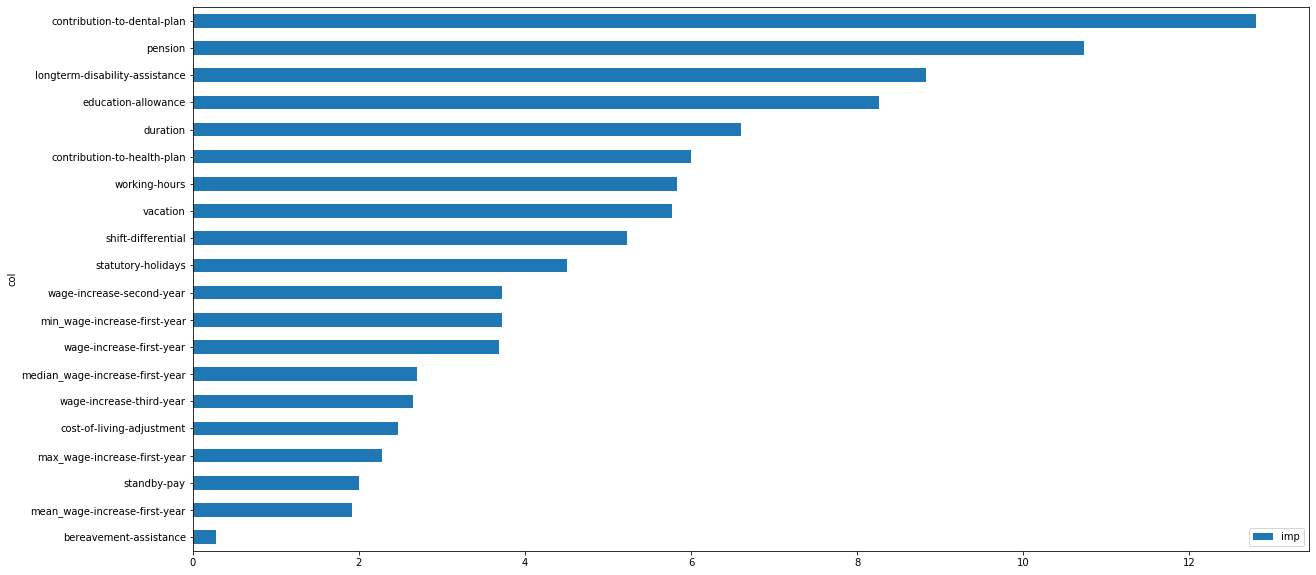

In [107]:
fea_imp = pd.DataFrame({'imp':m.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')    

In [108]:
preds = np.mean(y_pred_totcb, 0)

In [109]:
pred = pd.DataFrame(preds, columns=['class'])

In [110]:
pred['class'].value_counts()

1.0    5226
0.0    2668
0.8      35
0.2      30
0.6      24
0.4      17
Name: class, dtype: int64

In [111]:
pred['class'].describe()

count    8000.000000
mean        0.660150
std         0.471009
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: class, dtype: float64

In [112]:
def thresh(x):
    if x <= 0.5:#0.2
        return 0
    else:
        return 1

In [113]:
pred['class'] = pred['class'].apply(thresh)

In [114]:
pred['class'].value_counts()

1    5261
0    2739
Name: class, dtype: int64

In [115]:
pred.to_csv('submission18.csv',header=['class'],index=False)

In [321]:
pred.head()

,class
0,1
1,1
2,1
3,1
4,1


In [175]:
tp = pd.DataFrame()
for i in tqdm_notebook(range(7)):
    clf = CatBoostClassifier(l2_leaf_reg=10, eval_metric='F1', subsample=0.9)
    clf.fit(X, y, eval_set=[(X_train,y_train),(X_test, y_test)], verbose = 380)
    tp[i] = clf.predict(test)
test_preds = tp.mean(axis=1)

0:	learn: 0.9316152	test: 0.9308456	test1: 0.9346900	best: 0.9346900 (0)	total: 20.6ms	remaining: 20.6s
380:	learn: 0.9791612	test: 0.9790339	test1: 0.9796695	best: 0.9796695 (363)	total: 8.38s	remaining: 13.6s
760:	learn: 0.9811339	test: 0.9810027	test1: 0.9816579	best: 0.9816579 (712)	total: 16.5s	remaining: 5.17s
999:	learn: 0.9821706	test: 0.9822708	test1: 0.9817705	best: 0.9821301 (980)	total: 20.9s	remaining: 0us

bestTest = 0.9821300929
bestIteration = 980

Shrink model to first 981 iterations.
0:	learn: 0.9316152	test: 0.9308456	test1: 0.9346900	best: 0.9346900 (0)	total: 31ms	remaining: 30.9s
380:	learn: 0.9791612	test: 0.9790339	test1: 0.9796695	best: 0.9796695 (363)	total: 8.07s	remaining: 13.1s
760:	learn: 0.9811339	test: 0.9810027	test1: 0.9816579	best: 0.9816579 (712)	total: 15.2s	remaining: 4.77s
999:	learn: 0.9821706	test: 0.9822708	test1: 0.9817705	best: 0.9821301 (980)	total: 19.5s	remaining: 0us

bestTest = 0.9821300929
bestIteration = 980

Shrink model to first 981 

In [176]:
test_preds = tp.mean(axis=1)
print(pd.Series(test_preds).describe())

count    8000.000000
mean        0.658125
std         0.474368
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
dtype: float64


In [177]:
pred = pd.DataFrame(test_preds, columns=['class']).astype(int)

In [178]:
pred['class'].value_counts()

1    5265
0    2735
Name: class, dtype: int64

In [179]:
pred.to_csv('submission20.csv',header=['class'],index=False)